## Tensor

In general, all current machine-learning systems require tensors as their input data structure. A tensor is a container for numerical data. Tensors are a generalization of matrices to an arbitrary number of dimensions

A tensor has the following properties:

 * **Number of axis:** A vector has 1 axis, a matrix has 2 axis ets. Also called rank or dimension.
 * **Shape:** A tuple of integers that describes how many dimensions the tensor has along each axis. A matrix might have a shape (3,5). A vector has a shape with a single element, such as (5), whereas a scalar has an empty shape ().
 * **Data type**: The data type of the tensor values. This is a numeric like int8 or float32.
 
Lets look at the MNIST dataset for an example:

In [9]:
import numpy as np
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('Tensor train_images:')
print('Number of axes:', train_images.ndim)
print('Shape:', train_images.shape)
print('Data type:', train_images.dtype)

Tensor train_images:
Number of axes: 3
Shape: (60000, 28, 28)
Data type: uint8


`train_images` is a 3D tensor that is an array of 60,000 matrices of 28 × 28 integers.

### Scalars (0D tensors):
A tensor that contains only one number is called a *scalar*.

In [10]:
x = np.array(12)
print('Number of axes:', x.ndim)
print('Shape:', x.shape)
print('Data type:', x.dtype)

Number of axes: 0
Shape: ()
Data type: int64


### Vectors (1D tensors)
An array of numbers is called a *vector*, it has one axis.

In [11]:
x = np.array([3.0, 5.0, 1.0, 24.0])
print('Number of axes:', x.ndim)
print('Shape:', x.shape)
print('Data type:', x.dtype)

Number of axes: 1
Shape: (4,)
Data type: float64


This vector is a a 4-dimensional vector.

**Note:** Don’t confuse a 4-dimensional vector with a 4D tensor! A 4-dimensional vector has only one axis and has four dimensions along its axis, whereas a 4D tensor has four axes (and may have any number of dimensions along each axis). The term dimensionality is overloaded and can denote either the number of entries along a specific axis (as in the case of our 4-dimensional vector) or the number of axes in a tensor (such as a 4D tensor).




### Matrices (2D tensors)
An array of vectors is a matrix. A matrix has two axes, often referred to rows and columns. 

In [13]:
x = np.array([[5, 63, 5, 24, 8],
              [6, 71, 8, 42, 3],
              [7, 33, 1, 30, 8]])
print('Number of axes:', x.ndim)
print('Shape:', x.shape)
print('Data type:', x.dtype)

Number of axes: 2
Shape: (3, 5)
Data type: int64


### Higher dimensional Tensors
We can create an nD Tensor by arranging (n-1)D Tensors in an array. Example for a 3D Tensor:

In [14]:
x = np.array([
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]],
    [[10, 20, 30],
     [40, 50, 60],
     [70, 80, 90]]
    ])
print('Number of axes:', x.ndim)
print('Shape:', x.shape)
print('Data type:', x.dtype)

Number of axes: 3
Shape: (2, 3, 3)
Data type: int64


## Practical model input examples

In general, the first axis (axis 0) in all data tensors will be the samples axis. In the MNIST example, samples are images of digits. In addition, models don’t process an entire dataset at once, it is usually broken into smaller batches. For such a batch tensor, the first axis (axis 0) is called the batch axis.

### Timeseries data

When you want to represent a timeseries it makes sense to store it in a 3D tensor with an explicit time axis. In this case axis 1 will represent time and axis 2 will represent the features of the example.

<img src="images/3d-tensor.png" height="30" width="400"/>

For example take a dataset of stock prices:

 * There are 390 minutes in a trading day, this are our timesteps
 * At the end of every minute the following features are recorded:
   * the current stock price
   * the highest price in the past minute
   * the lowest price in the past minute
   
When a trading day constitutes a single example it can be represented as tensor of shape (390, 3). A dataset of 200 trading days can be represented as tensor of shape (200, 390, 3).

### Image data

Images have three dimensions: height, width, and color depth. A batch of 128 color images can be stored in a tensor of shape (128, 256, 256, 3).

<img src="images/4d-tensor.png" height="30" width="400"/>

The color dimension is often called **channel**. Note that there may be image formats with more than 3 dimensions, for example satellite images often contain non-visible bands of radiation.

Grayscale images could be stored as a 2D tensor, e.g. (256, 256). But usually they are stored as a 3D tensor with a 'fake' dimension, e.g. (256, 256, 1. It is usually more convenient to use the same shape for grayscale and color images.

There are two formats for shapes of image tensors: 

 * `channels-last` places the color-depth axis at the end: (samples, height, width, color_depth)
 * `channels-first` places the color depth axis right after the batch axis: (samples, color_depth, height, width)
 

### Text data
The problem with text is the variable length of sentences and documents that must be represented as a fixed shaped tensor. A common solution is to convert each document to a fixed size vector, for example by using a TFIDF representation or by using a Doc2Vec algorithm.  The other solution is to represent each word as an integer ID and just put the sequence of word in a vector of fixed size. Shorter documents are padded and longer documents are cut off.

## Output encoding

Binary classification: Output is the probability of the class label 1.

Categorical classification: Output is a probability distribution over all classes.

Depending on the problem the output often looks like one of the input encodings. Text translation, speech recognition, semantic segmentation (image to image), video to video translation etc.

## Activation functions
Activation functions are used for two different purposes:
 1. They add non-linear operations and enable the model to learn non-linear aspects of the data
 2. The final activation calculates an output that is useful for prediction and loss calculation

### Rectified Linear Unit  (ReLU)

The Rectified Linear Unit computes the function:

$$ f(x)=max(0, x) $$

The ReLU function is currently the default function to add non-linearity to a model.

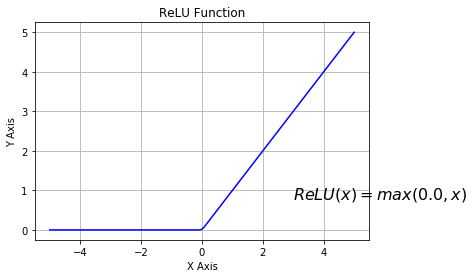

In [10]:
def ReLU(x):
    return np.maximum(0.0, x)
X = np.linspace(-5, 5, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(3, 0.8, r'$ReLU(x)=max(0.0, x)$', fontsize=16)
plt.show()

### Sigmoid function

The Sigmoid function squashes real numbers to range between [0,1].

$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

It is usually used as the final activation function for binary classification problems. It takes the unnormalized output of the previous layer and calculates $ P(y_i=1∣x_i) $, this is the probability that example $x_i$ belongs to class 1.



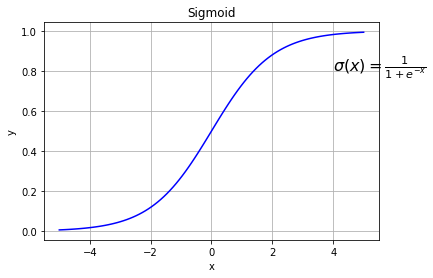

In [9]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid')
plt.grid()
plt.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()

## Softmax



The softmax function is a generalization of the sigmoid function to many values. It converts the activation of the previous layer into class probabilities.

Let $X=[x_1,...,x_n]$ be the activation of the previous layer.

$$
softmax(x_i) = \frac{e^{x_i}}{\sum_i^n e^{x_i}}
$$

In [7]:
import numpy as np

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
probs = softmax(z)
print('Last layer activation:', z)
print('Probabilities:', probs)
print('Predicted class:', np.argmax(probs))
print('Sum probabilities', probs.sum())

Last layer activation: [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
Probabilities: [0.02364054 0.06426166 0.1746813  0.474833   0.02364054 0.06426166
 0.1746813 ]
Predicted class: 3
Sum probabilities 0.9999999999999999


## Loss

<img src="images/cartoon_loss.png" height="300" width="400"/>

This is a cartoon depicting the effects of different learning rates:

 * With low learning rate the improvements will be almost linear
 * High learning rates will decay the loss faster, but they get stuck at worse values of loss (green line). This is because there is too much "energy" in the optimization and the parameters are bouncing around chaotically, unable to settle in a nice spot in the optimization landscape.
 * With very high learning rate the loss may even grow exponentially

<img src="images/real_loss.png" height="300" width="400"/>

This is what a reasonable loss might look like. The 'noise' is generated by the batching of the dataset.

## Loss function

Loss measures the compatibility between a prediction and the ground truth label. The loss takes the form of an average over the data losses for every individual example:

$$
L = \frac{1}{N}\sum_i^N L_i
$$

where N is the number of training examples.

A common choice for multi-class classification is the Softmax classifier that uses the cross-entropy loss:

$$
L_i = -log(\frac{e^{f_{y_i}}}{\sum_j e^{f_j}})
$$

What does this mean?

$f(x_i)$ is the output of the layer before the softmax. It is a vector that has as many elements as we have classes. Each element is the unnormalized probability for the corresponding class. $f_k$ is the k-th element of this vector.

The **softmax function** is a popular choice to normalize probabilities (make them sum to 1). In our case it normalizes the unnormalized probability of the true label.

At last we calculate the negative log of the predicted probability of the true class. This is called **cross entropy function**.

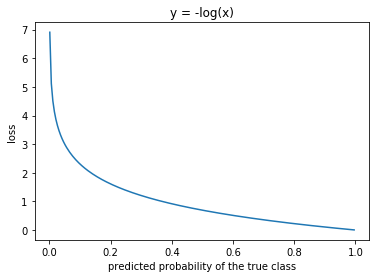

In [9]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.001, 1.0, 0.005)
y = -np.log(x)
plt.plot(x,y)
plt.title('y = -log(x)')
plt.ylabel('loss')
plt.xlabel('predicted probability of the true class')
plt.show()

A high predicted probability for the true class results in a low loss. The cross entropy function only cares about the predicted probability of the true class and ignores the probabilities of the other classes.

Reminder why we need the loss function:
 1. At training it measures the train error (the loss) of the model prediction after the forward pass. This controls the gradient updates during backpropagation.
 2. At evaluation is measures the evaluation error.
 
The input to a cross-entropy loss must be a probability distribution. It can not be used with unnormalized scores: the log is not defined for negative numbers and for scores > 1 the loss becomes negative. 